In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Mar 17 14:14:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Installs

In [ ]:
!pip install nnunetv2 -q
!pip install batchgenerators -q
!pip install --upgrade git+https://github.com/FabianIsensee/hiddenlayer.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.1/184.1 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.5/39.5 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

## Imports

In [ ]:
import os
import torch
import nnunetv2
from nnunetv2.dataset_conversion.generate_dataset_json import generate_dataset_json
import numpy as np
from PIL import Image
from skimage import io
import shutil
from batchgenerators.utilities.file_and_folder_operations import *
import hiddenlayer

## Preprocesamiento de las imágenes

In [ ]:
def load_and_covnert_case(input_seg):
    seg = io.imread(input_seg)
    seg[seg == 255] = 0
    seg[seg == 50] = 0
    seg[seg == 11] = 1
    seg[seg == 21] = 2
    seg[seg == 13] = 3
    seg[seg == 12] = 4
    seg[seg == 5] = 12
    seg[seg == 31] = 5
    seg[seg == 23] = 6
    seg[seg == 24] = 7
    seg[seg == 25] = 8
    seg[seg == 32] = 9
    seg[seg == 22] = 10
    seg[seg == 33] = 11
    io.imsave(input_seg, seg, check_contrast=False)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [ 50,  50,  50],
        [ 50,  50,  50],
        ...,
        [ 50,  50,  50],
        [ 50,  50,  50],
        [255, 255, 255]],

       [[255, 255, 255],
        [ 50,  50,  50],
        [ 50,  50,  50],
        ...,
        [ 50,  50,  50],
        [ 50,  50,  50],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [ 50,  50,  50],
        [ 50,  50,  50],
        ...,
        [ 50,  50,  50],
        [ 50,  50,  50],
        [255, 255, 255]],

       [[255, 255, 255],
        [ 50,  50,  50],
        [ 50,  50,  50],
        ...,
        [ 50,  50,  50],
        [ 50,  50,  50],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
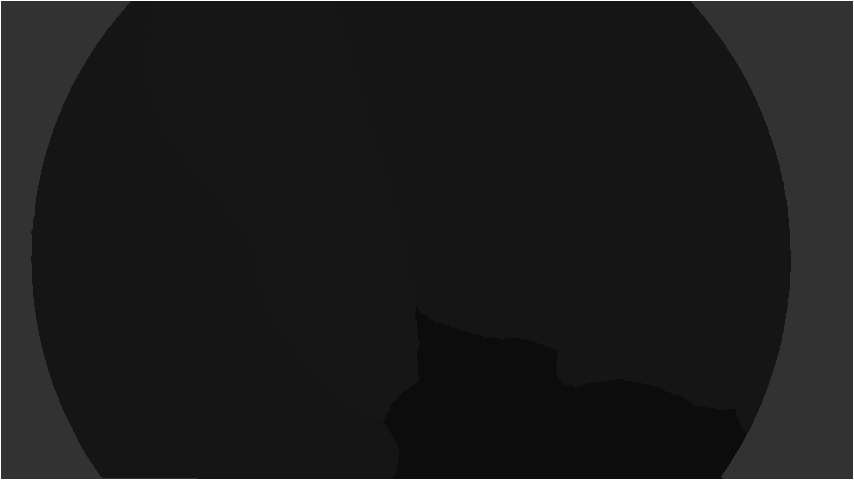

In [ ]:
antes_del_procesado = Image.open('/content/drive/MyDrive/TFG/V2/nnUNet_raw/Dataset212_CholecSeg8kV2/labelsTr/CS_0000.png')
np.array(antes_del_procesado)

In [ ]:
print(np.unique(np.array(antes_del_procesado)))

[ 12  13  21  22  50 255]


In [ ]:
labels = subfiles('/content/drive/MyDrive/TFG/V2/nnUNet_raw/Dataset212_CholecSeg8kV2/labelsTr', suffix='png')
for l in labels:
  load_and_covnert_case(l)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
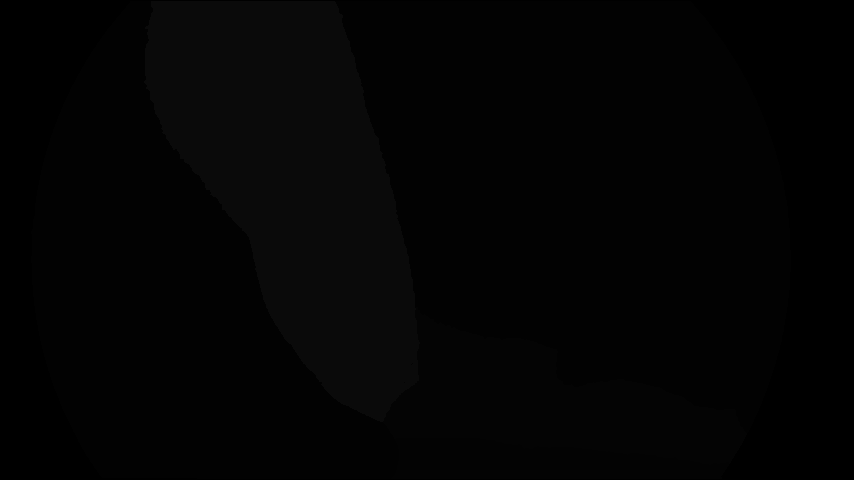

In [ ]:
despues_del_procesado = Image.open('/content/drive/MyDrive/TFG/V2/nnUNet_raw/Dataset212_CholecSeg8kV2/labelsTr/CS_0000.png')
np.array(despues_del_procesado)

In [ ]:
print(np.unique(np.array(despues_del_procesado)))

[ 0  2  3  4 10]


In [ ]:
labels_test = subfiles('/content/drive/MyDrive/TFG/V2/evaluationV2/labelsTs', suffix='png')
for l in labels_test:
  load_and_covnert_case(l)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
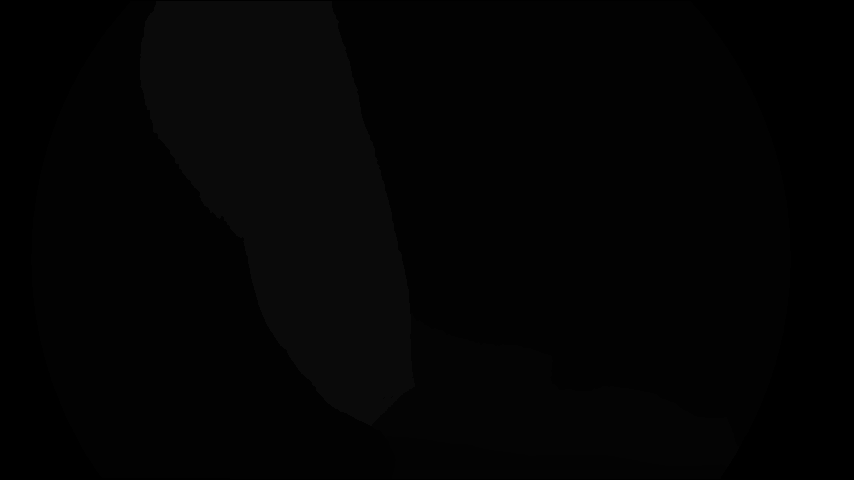

In [ ]:
despues_del_procesado_test = Image.open('/content/drive/MyDrive/TFG/V2/evaluationV2/labelsTs/CS_0002.png')
np.array(despues_del_procesado_test)

In [ ]:
import random
train_x = subfiles('/content/drive/MyDrive/TFG/V2/nnUNet_raw/Dataset212_CholecSeg8kV2/imagesTr')


num_files_to_copy = 10

files_to_copy_train = random.sample(train_x, num_files_to_copy)

for file_path in files_to_copy_train:
  file_name = os.path.basename(file_path)
  num = file_name.split('_')[1]
  shutil.copy(file_path, f'/content/drive/MyDrive/TFG/V2/nnUNet_raw/Dataset213_CholecSeg8k_T10/imagesTr/{file_name}')
  shutil.copy(f'/content/drive/MyDrive/TFG/V2/nnUNet_raw/Dataset212_CholecSeg8kV2/labelsTr/CS_{num}.png', f'/content/drive/MyDrive/TFG/V2/nnUNet_raw/Dataset213_CholecSeg8k_T10/labelsTr/CS_{num}.png')

## Inicializar variables de entorno

In [ ]:
os.environ["nnUNet_raw"] = "/content/drive/MyDrive/TFG/V2/nnUNet_raw"
os.environ["nnUNet_preprocessed"] = "/content/drive/MyDrive/TFG/V2/nnUNet_preprocessed"
os.environ["nnUNet_results"] = "/content/drive/MyDrive/TFG/V2/nnUNet_results"

## Plan and Preprocess nnU-Net V2

In [ ]:
generate_dataset_json('/content/drive/MyDrive/TFG/V2/nnUNet_raw/Dataset213_CholecSeg8k',
                      {0: 'R', 1: 'G', 2: 'B'},
                      {'background': 0,
                       'abdominal_wall': 1,
                       'liver': 2,
                       'gastrointestinal_tract': 3,
                       'fat': 4,
                       'grasper': 5,
                       'connective_tissue': 6,
                       'blood': 7,
                       'cystic_duct': 8,
                       'lhook_electrocautery': 9,
                       'gallbladder': 10,
                       'hepatic_vein': 11,
                       'liver_ligament': 12},
                      10, '.png', dataset_name="CholecSeg8k")

In [ ]:
!nnUNetv2_plan_and_preprocess -h

usage: nnUNetv2_plan_and_preprocess [-h] [-d D [D ...]] [-fpe FPE] [-npfp NPFP]
                                    [--verify_dataset_integrity] [--no_pp] [--clean] [-pl PL]
                                    [-gpu_memory_target GPU_MEMORY_TARGET]
                                    [-preprocessor_name PREPROCESSOR_NAME]
                                    [-overwrite_target_spacing OVERWRITE_TARGET_SPACING [OVERWRITE_TARGET_SPACING ...]]
                                    [-overwrite_plans_name OVERWRITE_PLANS_NAME] [-c C [C ...]]
                                    [-np NP [NP ...]] [--verbose]

options:
  -h, --help            show this help message and exit
  -d D [D ...]          [REQUIRED] List of dataset IDs. Example: 2 4 5. This will run fingerprint
                        extraction, experiment planning and preprocessing for these datasets. Can
                        of course also be just one dataset
  -fpe FPE              [OPTIONAL] Name of the Dataset Fingerprint Extrac

In [ ]:
!nnUNetv2_plan_and_preprocess -d 212 --verify_dataset_integrity

Fingerprint extraction...
Dataset213_CholecSeg8k_T10
Using <class 'nnunetv2.imageio.natural_image_reader_writer.NaturalImage2DIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Using <class 'nnunetv2.imageio.natural_image_reader_writer.NaturalImage2DIO'> as reader/writer
100% 10/10 [00:07<00:00,  1.30it/s]
Experiment planning...

############################
INFO: You are using the old nnU-Net default planner. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

2D U-Net configuration:
{'data_identifier': 'nnUNetPlans_2d', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 2, 'patch_size': (512, 896), 'median_image_size_in_voxels': array([480., 853.]), 'spacing': array([1., 1.]), 'normalization_schemes': ['ZScoreNorm

## Entrenamiento nnU-Net V2

In [ ]:
!nnUNetv2_train -h

usage: nnUNetv2_train [-h] [-tr TR] [-p P] [-pretrained_weights PRETRAINED_WEIGHTS]
                      [-num_gpus NUM_GPUS] [--use_compressed] [--npz] [--c] [--val] [--val_best]
                      [--disable_checkpointing] [-device DEVICE]
                      dataset_name_or_id configuration fold

positional arguments:
  dataset_name_or_id    Dataset name or ID to train with
  configuration         Configuration that should be trained
  fold                  Fold of the 5-fold cross-validation. Should be an int between 0 and 4.

options:
  -h, --help            show this help message and exit
  -tr TR                [OPTIONAL] Use this flag to specify a custom trainer. Default:
                        nnUNetTrainer
  -p P                  [OPTIONAL] Use this flag to specify a custom plans identifier. Default:
                        nnUNetPlans
  -pretrained_weights PRETRAINED_WEIGHTS
                        [OPTIONAL] path to nnU-Net checkpoint file to be used as pretrained mo

### Entrenamiento 1

In [ ]:
!nnUNetv2_train Dataset212_CholecSeg8kV2 2d 0

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################


This is the configuration used by this training:
Configuration name: 2d
 {'data_identifier': 'nnUNetPlans_2d', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 13, 'patch_size': [384, 640], 'median_image_size_in_voxels': [480.0, 853.0], 'spacing': [1.0, 1.0], 'normalization_schemes': ['ZScoreNormalization', 'ZScoreNormalization', 'ZScoreNormalization'], 'use_mask_for_norm': [False, False, False], 'UNet_class_name': 'PlainConvUNet', 'UNet_base_num_features': 32, 'n_conv_per_stage_encoder': [2, 2, 2, 2, 2, 2, 2], 'n_conv_per_stage_decoder': [2, 2, 2, 2, 2, 2], '

### Resto de entrenamientos


In [ ]:
!nnUNetv2_train Dataset212_CholecSeg8kV2 2d 0 -tr nnUNetTrainer_250epochs --c

Using device: cuda:0
/usr/local/lib/python3.10/dist-packages/nnunetv2/utilities/plans_handling/plans_handler.py:37: UserWarning: Detected old nnU-Net plans format. Attempting to reconstruct network architecture parameters. If this fails, rerun nnUNetv2_plan_experiment for your dataset. If you use a custom architecture, please downgrade nnU-Net to the version you implemented this or update your implementation + plans.
  warnings.warn("Detected old nnU-Net plans format. Attempting to reconstruct network architecture "

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################


This is the configuration used by this training:
Configuration name: 2d
 {

## Inferencia

In [ ]:
!nnUNetv2_train Dataset212_CholecSeg8kV2 2d 0 -tr nnUNetTrainer_250epochs --val --npz

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
2024-03-24 15:11:51.246871: Using splits from existing split file: /content/drive/MyDrive/TFG/V2/nnUNet_preprocessed/Dataset212_CholecSeg8kV2/splits_final.json
2024-03-24 15:11:51.688411: The split file contains 5 splits.
2024-03-24 15:11:51.700790: Desired fold for training: 0
2024-03-24 15:11:51.710853: This split h

In [ ]:
!nnUNetv2_find_best_configuration -h

usage: nnUNetv2_find_best_configuration [-h] [-p P [P ...]] [-c C [C ...]] [-tr TR [TR ...]]
                                        [-np NP] [-f F [F ...]] [--disable_ensembling]
                                        [--no_overwrite]
                                        dataset_name_or_id

positional arguments:
  dataset_name_or_id    Dataset Name or id

options:
  -h, --help            show this help message and exit
  -p P [P ...]          List of plan identifiers. Default: nnUNetPlans
  -c C [C ...]          List of configurations. Default: ['2d', '3d_fullres', '3d_lowres',
                        '3d_cascade_fullres']
  -tr TR [TR ...]       List of trainers. Default: nnUNetTrainer
  -np NP                Number of processes to use for ensembling, postprocessing etc
  -f F [F ...]          Folds to use. Default: 0 1 2 3 4
  --disable_ensembling  Set this flag to disable ensembling
  --no_overwrite        If set we will not overwrite already ensembled files etc. May speed up
 

In [ ]:
!nnUNetv2_find_best_configuration Dataset212_CholecSeg8kV2 -c 2d -tr nnUNetTrainer_250epochs --disable_ensembling -f 0


***All results:***
nnUNetTrainer_250epochs__nnUNetPlans__2d: 0.9333262798129236

*Best*: nnUNetTrainer_250epochs__nnUNetPlans__2d: 0.9333262798129236

***Determining postprocessing for best model/ensemble***
Removing all but the largest foreground region did not improve results!
Removing all but the largest component for 1 did not improve results! Dice before: 0.97776 after: 0.91132
Removing all but the largest component for 2 did not improve results! Dice before: 0.98188 after: 0.84229
Removing all but the largest component for 3 did not improve results! Dice before: 0.92568 after: 0.92327
Removing all but the largest component for 4 did not improve results! Dice before: 0.97815 after: 0.91351
Removing all but the largest component for 5 did not improve results! Dice before: 0.94776 after: 0.8922
Removing all but the largest component for 6 did not improve results! Dice before: 0.95804 after: 0.94498
Removing all but the largest component for 7 did not improve results! Dice before: 0

In [ ]:
!nnUNetv2_predict -d Dataset212_CholecSeg8kV2 -i /content/drive/MyDrive/TFG/V2/nnUNet_raw/Dataset212_CholecSeg8kV2/imagesTs -o /content/drive/MyDrive/TFG/V2/evaluationV2/predictionsTs -f  0 -tr nnUNetTrainer_250epochs -c 2d -p nnUNetPlans

Se han truncado las últimas 5000 líneas del flujo de salida.
sending off prediction to background worker for resampling and export
done with CS_3982

Predicting CS_3988:
perform_everything_on_device: True
100% 1/1 [00:00<00:00, 19.91it/s]
sending off prediction to background worker for resampling and export
done with CS_3988

Predicting CS_3989:
perform_everything_on_device: True
100% 1/1 [00:00<00:00, 15.87it/s]
sending off prediction to background worker for resampling and export
done with CS_3989

Predicting CS_3991:
perform_everything_on_device: True
100% 1/1 [00:00<00:00, 25.17it/s]
sending off prediction to background worker for resampling and export
done with CS_3991

Predicting CS_3992:
perform_everything_on_device: True
100% 1/1 [00:00<00:00, 24.52it/s]
sending off prediction to background worker for resampling and export
done with CS_3992

Predicting CS_3996:
perform_everything_on_device: True
100% 1/1 [00:00<00:00, 23.92it/s]
sending off prediction to background worker for r

In [ ]:
!nnUNetv2_evaluate_folder -h

usage: nnUNetv2_evaluate_folder [-h] -djfile DJFILE -pfile PFILE [-o O] [-np NP] [--chill]
                                gt_folder pred_folder

positional arguments:
  gt_folder       folder with gt segmentations
  pred_folder     folder with predicted segmentations

options:
  -h, --help      show this help message and exit
  -djfile DJFILE  dataset.json file
  -pfile PFILE    plans.json file
  -o O            Output file. Optional. Default: pred_folder/summary.json
  -np NP          number of processes used. Optional. Default: 8
  --chill         dont crash if folder_pred does not have all files that are present in folder_gt


In [ ]:
!nnUNetv2_evaluate_folder -djfile /content/drive/MyDrive/TFG/V2/nnUNet_results/Dataset212_CholecSeg8kV2/nnUNetTrainer_250epochs__nnUNetPlans__2d/crossval_results_folds_0/dataset.json -pfile /content/drive/MyDrive/TFG/V2/nnUNet_results/Dataset212_CholecSeg8kV2/nnUNetTrainer_250epochs__nnUNetPlans__2d/crossval_results_folds_0/plans.json /content/drive/MyDrive/TFG/V2/evaluationV2/labelsTs /content/drive/MyDrive/TFG/V2/evaluationV2/predictionPP

Using <class 'nnunetv2.imageio.natural_image_reader_writer.NaturalImage2DIO'> as reader/writer


## Postprocesado

In [ ]:
!pip install batchgenerators -q

In [ ]:
import os
import shutil
import numpy as np
from batchgenerators.utilities.file_and_folder_operations import *
from skimage import io
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
!nnUNetv2_apply_postprocessing -i /content/drive/MyDrive/TFG/V2/evaluationV2/predictionsTs -o /content/drive/MyDrive/TFG/V2/evaluationV2/predictionPP -pp_pkl_file /content/drive/MyDrive/TFG/V2/nnUNet_results/Dataset212_CholecSeg8kV2/nnUNetTrainer_250epochs__nnUNetPlans__2d/crossval_results_folds_0/postprocessing.pkl -np 8 -plans_json /content/drive/MyDrive/TFG/V2/nnUNet_results/Dataset212_CholecSeg8kV2/nnUNetTrainer_250epochs__nnUNetPlans__2d/crossval_results_folds_0/plans.json

In [ ]:
def colorear_seg_maps(seg_maps):
  seg2 = np.zeros((480, 854, 3))

  seg2[:, :, 0] = seg_maps
  seg2[:, :, 1] = seg_maps
  seg2[:, :, 2] = seg_maps

  pixeles_0 = np.all(seg2 == [0, 0, 0], axis=2)
  pixeles_1 = np.all(seg2 == [1, 1, 1], axis=2)
  pixeles_2 = np.all(seg2 == [2, 2, 2], axis=2)
  pixeles_3 = np.all(seg2 == [3, 3, 3], axis=2)
  pixeles_4 = np.all(seg2 == [4, 4, 4], axis=2)
  pixeles_5 = np.all(seg2 == [5, 5, 5], axis=2)
  pixeles_6 = np.all(seg2 == [6, 6, 6], axis=2)
  pixeles_7 = np.all(seg2 == [7, 7, 7], axis=2)
  pixeles_8 = np.all(seg2 == [8, 8, 8], axis=2)
  pixeles_9 = np.all(seg2 == [9, 9, 9], axis=2)
  pixeles_10 = np.all(seg2 == [10, 10, 10], axis=2)
  pixeles_11 = np.all(seg2 == [11, 11, 11], axis=2)
  pixeles_12 = np.all(seg2 == [12, 12, 12], axis=2)


  seg2[pixeles_0] = [127, 127, 127]
  seg2[pixeles_1] = [210, 140, 140]
  seg2[pixeles_2] = [255, 114, 114]
  seg2[pixeles_3] = [231, 70, 156]
  seg2[pixeles_4] = [186, 183, 75]
  seg2[pixeles_5] = [170, 255, 0]
  seg2[pixeles_6] = [255, 85, 0]
  seg2[pixeles_7] = [255, 0, 0]
  seg2[pixeles_8] = [255, 255, 0]
  seg2[pixeles_9] = [169, 255, 184]
  seg2[pixeles_10] = [255, 160, 165]
  seg2[pixeles_11] = [0, 50, 128]
  seg2[pixeles_12] = [111, 74, 0]

  return seg2

In [ ]:
test_predictions = subfiles('/content/drive/MyDrive/TFG/V2/evaluationV2/predictionPP')

for file_path in test_predictions:
    file_name = os.path.basename(file_path)
    imagen = io.imread(file_path)
    nueva_imagen = colorear_seg_maps(imagen)
    nueva_imagen = nueva_imagen.astype(np.uint8)
    io.imsave(f'/content/drive/MyDrive/TFG/V2/evaluationV2/predictionPP_Colored/{file_name}', nueva_imagen, check_contrast=False)

ValueError: Could not find a backend to open `/content/drive/MyDrive/TFG/V2/evaluationV2/predictionPP/summary.json`` with iomode `ri`.